In [99]:
import os,codecs
import pandas as pd
import nltk
from nltk import*
import matplotlib.pyplot as plt
import string
import numpy as np
import seaborn as sns
import seaborn as sns

# Data Cleaning

In [100]:
df = pd.read_csv("XED.txt",  error_bad_lines=False, sep= '\t', header= None, names = ["sent", "label_1"])

In [101]:
df.shape

(17528, 2)

In [102]:
df[["label_1", "label_2"]] = df['label_1'].str.split(",", 1, expand=True)
df[["label_2", "label_3"]] = df['label_2'].str.split(",", 1, expand=True)

In [103]:
df.head()

,sent,label_1,label_2,label_3
0,", ...",1,None,None
1,!,1,4,7
2,... And I don't think we need to discuss the T...,8,1,None
3,* So get up out of your bed,1,None,None
4,A confession that you hired [PERSON] ... and a...,1,6,None


In [104]:
df["label_1"] = pd.to_numeric(df["label_1"])
df["label_2_fill"] = np.where(df.label_2.isnull(), df.label_1, df.label_2)
df["label_2_fill"] = pd.to_numeric(df["label_2_fill"])

In [105]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [106]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    
               
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    table = str.maketrans('', '', string.punctuation)
    lst_text = [w.translate(table) for w in lst_text]
    text = " ".join(lst_text)
    return text


In [107]:
df["text_clean"] = df["sent"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords= lst_stopwords))

In [108]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row["text_clean"]), axis=1)
df.head()

,sent,label_1,label_2,label_3,label_2_fill,text_clean,tokenized_sents
0,", ...",1,None,None,1,,[]
1,!,1,4,7,4,,[]
2,... And I don't think we need to discuss the T...,8,1,None,1,and i dont think we need to discuss the trinit...,"[and, i, dont, think, we, need, to, discuss, t..."
3,* So get up out of your bed,1,None,None,1,so get up out of your bed,"[so, get, up, out, of, your, bed]"
4,A confession that you hired [PERSON] ... and a...,1,6,None,6,a confession that you hired person and are res...,"[a, confession, that, you, hired, person, and,..."


In [109]:
df = df[["sent","text_clean", "label_1", "label_2_fill","tokenized_sents"]]

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sent             17528 non-null  object
 1   text_clean       17528 non-null  object
 2   label_1          17528 non-null  int64 
 3   label_2_fill     17528 non-null  int64 
 4   tokenized_sents  17528 non-null  object
dtypes: int64(2), object(3)
memory usage: 684.8+ KB


In [111]:
h = df[df["text_clean"] == ""]

In [112]:
h.shape

(3, 5)

In [113]:
h

,sent,text_clean,label_1,label_2_fill,tokenized_sents
0,", ...",,1,1,[]
1,!,,1,4,[]
3160,% ? !,,7,7,[]


In [114]:
h = df[df["text_clean"] == ""].index
df.drop(h, inplace=True)

In [115]:
df = df.reset_index(drop=True)

In [116]:
df.shape

(17525, 5)

In [117]:
df.head()

,sent,text_clean,label_1,label_2_fill,tokenized_sents
0,... And I don't think we need to discuss the T...,and i dont think we need to discuss the trinit...,8,1,"[and, i, dont, think, we, need, to, discuss, t..."
1,* So get up out of your bed,so get up out of your bed,1,1,"[so, get, up, out, of, your, bed]"
2,A confession that you hired [PERSON] ... and a...,a confession that you hired person and are res...,1,6,"[a, confession, that, you, hired, person, and,..."
3,A dead man has one half - hour to raise his ro...,a dead man has one half hour to raise his roll...,1,1,"[a, dead, man, has, one, half, hour, to, raise..."
4,A guy that's talking about he's gonna solve al...,a guy thats talking about hes gonna solve all ...,1,1,"[a, guy, thats, talking, about, hes, gon, na, ..."


#  Emolex


In [118]:
file = "NRC_emotion_lexicon_list.txt"
emolex_df = pd.read_csv(file,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(10)

,word,emotion,association
0,abandonment,negative,1
1,abandonment,positive,0
2,abandonment,sadness,1
3,abandonment,surprise,1
4,abandonment,trust,0
5,abate,anger,0
6,abate,anticipation,0
7,abate,disgust,0
8,abate,fear,0
9,abate,joy,0


In [119]:
emolex_df.shape

(141775, 3)

In [120]:
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()

In [121]:
emotions = emolex_words.columns.drop('word')
emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

In [122]:
emotions

Index(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust'],
      dtype='object', name='emotion')

In [123]:
emolex_words.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abandonment,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0.0
2,abate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abatement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abba,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# The Hit Rate of Emolex (47.95 %)

In [124]:
word_list = []
for sent in df.tokenized_sents:
    for word in sent:
        word_list.append(word)

In [125]:
len(word_list)

130534

In [126]:
len(set(word_list))

8586

In [127]:
emo_words = []
for word in emolex_words.word:
    emo_words.append(word)
print(len(emo_words))

14178


In [128]:
match = []
for word in word_list:
    if word in emo_words:
        match.append(word)

In [129]:
print(len(match))
print(len(set(match)))

28707
4117


In [130]:
print("The hit rate is", round(len(set(match))*100/len(set(word_list)), 3) , "%")

The hit rate is 47.95 %


In [131]:
from nrclex import NRCLex

In [132]:
my_list = []
for row in df.text_clean:
    my_list.append(row)

In [133]:
len(my_list)

17525

In [134]:
text = df.text_clean[11]
text

'a lost decade but it was worth it to make your father pay for my loss'

In [135]:
text_object =  NRCLex(text)
d = text_object.raw_emotion_scores
print(d)

{'negative': 2, 'sadness': 2, 'positive': 2, 'trust': 2, 'anticipation': 1, 'joy': 1, 'anger': 1, 'fear': 1}


In [136]:
data = pd.DataFrame()
dicts = []
neg = []
pos = []
fear = []
anger = []
disg = []
joy = []
anticipation = []
trust = []
surp = []
sad = []
for sent in my_list:
    text_object =  NRCLex(sent)
    d = text_object.raw_emotion_scores
    for j in emotions:
        if j not in d.keys():
            d[j] = 0
    dicts.append(d)
    
for dic in dicts:
    neg.append(dic["negative"])
    pos.append(dic["positive"])
    fear.append(dic["fear"])
    anger.append(dic["anger"])
    disg.append(dic["disgust"])
    joy.append(dic["joy"])
    anticipation.append(dic["anticipation"])
    trust.append(dic["trust"])
    surp.append(dic["surprise"])
    sad.append(dic["sadness"])
   


In [137]:
print(len(pos))
print(len(neg))
print(len(fear))
print(len(anger))
print(len(disg))
print(len(joy))
print(len(anticipation))
print(len(trust))
print(len(surp))
print(len(sad))

17525
17525
17525
17525
17525
17525
17525
17525
17525
17525


In [138]:
data["cleaned"] = my_list
data["pos"] = pos
data["neg"] = neg
data["fear"] = fear
data["anger"] = anger
data["disg"] = disg
data["joy"] = joy
data["anticipation"] = anticipation
data["trust"] = trust
data["surp"] = surp
data["sad"] = sad

data.head()

,cleaned,pos,neg,fear,anger,disg,joy,anticipation,trust,surp,sad
0,and i dont think we need to discuss the trinit...,0,0,0,0,0,0,0,0,0,0
1,so get up out of your bed,0,0,0,0,0,0,0,0,0,0
2,a confession that you hired person and are res...,1,2,2,1,1,0,1,1,2,2
3,a dead man has one half hour to raise his roll...,0,0,0,0,0,0,0,0,0,0
4,a guy thats talking about hes gonna solve all ...,0,0,0,0,0,0,0,0,0,0


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17525 entries, 0 to 17524
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleaned       17525 non-null  object
 1   pos           17525 non-null  int64 
 2   neg           17525 non-null  int64 
 3   fear          17525 non-null  int64 
 4   anger         17525 non-null  int64 
 5   disg          17525 non-null  int64 
 6   joy           17525 non-null  int64 
 7   anticipation  17525 non-null  int64 
 8   trust         17525 non-null  int64 
 9   surp          17525 non-null  int64 
 10  sad           17525 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 1.5+ MB


In [140]:
data["sum"] = data.sum(axis=1)

In [141]:
data["sum"].value_counts()

0     7667
1     2149
2     1738
3     1543
5     1302
4     1150
6      666
7      377
8      282
9      212
10     138
11      93
12      71
13      48
15      27
16      20
14      18
17       8
19       5
18       5
22       4
20       1
21       1
Name: sum, dtype: int64

In [142]:
data["label_1"] = df.label_1
data["label_2_fill"] = df.label_2_fill

In [143]:
data = data.drop(data[data["sum"] == 0].index)

In [144]:
data = data.reset_index(drop=True)
data.head()

,cleaned,pos,neg,fear,anger,disg,joy,anticipation,trust,surp,sad,sum,label_1,label_2_fill
0,a confession that you hired person and are res...,1,2,2,1,1,0,1,1,2,2,13,1,6
1,a guy who was a pain in the neck even before i...,0,1,1,0,0,0,0,0,0,1,3,1,1
2,a hundred of these are produced every day and ...,1,1,1,1,1,0,1,0,0,1,7,1,3
3,a little restraint,1,0,0,0,0,0,0,0,0,0,1,1,1
4,a lost decade but it was worth it to make your...,2,2,1,1,0,1,1,2,0,2,12,1,1


In [145]:
data.shape

(9858, 14)

# Evaluating the Performance of Emolex

* The polarity, the target is positive if the number of the positive words in the sentence is bigger than the number of the negative words

In [146]:
data["pos_target"] = data["joy"] + data["anticipation"] + data["trust"] + data["pos"]
data["neg_target"] = data["fear"] + data["anger"] + data["disg"] + data["surp"] + data["sad"] + data["neg"]

In [147]:
data.head()

,cleaned,pos,neg,fear,anger,disg,joy,anticipation,trust,surp,sad,sum,label_1,label_2_fill,pos_target,neg_target
0,a confession that you hired person and are res...,1,2,2,1,1,0,1,1,2,2,13,1,6,3,10
1,a guy who was a pain in the neck even before i...,0,1,1,0,0,0,0,0,0,1,3,1,1,0,3
2,a hundred of these are produced every day and ...,1,1,1,1,1,0,1,0,0,1,7,1,3,2,5
3,a little restraint,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0
4,a lost decade but it was worth it to make your...,2,2,1,1,0,1,1,2,0,2,12,1,1,6,6


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [149]:
data_diff = data.copy()
data_diff.drop(data_diff.loc[data_diff["pos_target"]==data_diff["neg_target"]].index, inplace=True)


* removing the datapoints where the sum of the positive words and the sum of the negative words are the same

In [150]:
data_diff = data_diff.reset_index(drop=True)
data_diff.shape

(9377, 16)

In [151]:
data_diff["target"] = data_diff[["pos_target", "neg_target"]].idxmax(axis=1)

In [152]:
data_diff = data_diff[["cleaned", "label_1", "label_2_fill", "target"]]

In [153]:
data_diff["label_polarity"] = data_diff["label_1"].map({1:0, 2:1, 3:0, 4:0, 5:1, 6:0, 7:0, 8:1})
data_diff["label_polarity_2"] = data_diff["label_2_fill"].map({1:0, 2:1, 3:0, 4:0, 5:1, 6:0, 7:0, 8:1})
data_diff["target_polarity"] = data_diff["target"].map({'neg_target':0, 'pos_target':1})

In [154]:
X = data_diff["cleaned"]
y_target = data_diff["target_polarity"]
y_label = data_diff["label_polarity"]

In [155]:
data_diff.label_polarity.value_counts()

0    5533
1    3844
Name: label_polarity, dtype: int64

In [156]:
data_diff.target_polarity.value_counts()

1    4991
0    4386
Name: target_polarity, dtype: int64

Macro F1-score: 0.6504264166232048 
 Accuracy: 65.15943265436707


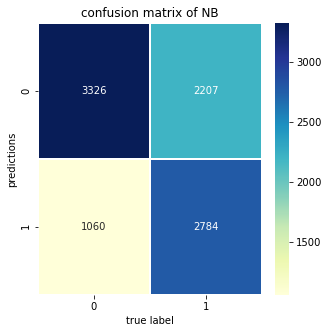

In [157]:
f1_macro = f1_score(data_diff.label_polarity, data_diff.target_polarity, average='macro')
acc = accuracy_score(data_diff.label_polarity, data_diff.target_polarity)*100
print("Macro F1-score:", f1_macro, "\n", "Accuracy:", acc)
confusion_matrix = metrics.confusion_matrix(data_diff.label_polarity, data_diff.target_polarity)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix of NB")
plt.xlabel("true label");
plt.ylabel("predictions");

In [158]:
# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# LogisticRegression 
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

In [159]:
X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [160]:
print("Report of MultinomialNB EmoLex Polarity (sums vs label_1)")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB EmoLex Polarity (sums vs label_1)
Confusion Matrix 
 [[855 807]
 [297 855]]
              precision    recall  f1-score   support

           0       0.74      0.51      0.61      1662
           1       0.51      0.74      0.61      1152

    accuracy                           0.61      2814
   macro avg       0.63      0.63      0.61      2814
weighted avg       0.65      0.61      0.61      2814

Accuracy Score:  0.6076759061833689


In [161]:
print("Report of LinearSVC EmoLex Polarity (sums vs label_1)")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC EmoLex Polarity (sums vs label_1)
Confusion Matrix 
 [[926 736]
 [337 815]]
              precision    recall  f1-score   support

           0       0.73      0.56      0.63      1662
           1       0.53      0.71      0.60      1152

    accuracy                           0.62      2814
   macro avg       0.63      0.63      0.62      2814
weighted avg       0.65      0.62      0.62      2814

Accuracy Score:  0.6186922530206113


In [162]:
print("Report of LogisticRegression EmoLex Polarity (sums vs label_1)")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression EmoLex Polarity (sums vs label_1)
Confusion Matrix 
 [[882 780]
 [331 821]]
              precision    recall  f1-score   support

           0       0.73      0.53      0.61      1662
           1       0.51      0.71      0.60      1152

    accuracy                           0.61      2814
   macro avg       0.62      0.62      0.61      2814
weighted avg       0.64      0.61      0.61      2814

Accuracy Score 0.6051883439943141


# label_2 vs sums

In [163]:
y_label = data_diff["label_polarity_2"]
X_train, X_test, y_train_t, y_test_t, y_train_l, y_test_l = train_test_split(X, y_target, y_label, test_size=0.30, random_state=42)

In [164]:
data_diff.label_polarity_2.value_counts()

0    5714
1    3663
Name: label_polarity_2, dtype: int64

Macro F1-score: 0.6406063012125109 
 Accuracy: 64.27428815186093


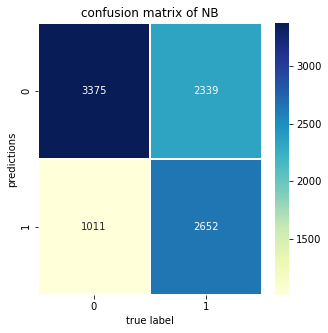

In [165]:
f1_macro = f1_score(data_diff.label_polarity_2, data_diff.target_polarity, average='macro')
acc = accuracy_score(data_diff.label_polarity_2, data_diff.target_polarity)*100
print("Macro F1-score:", f1_macro, "\n", "Accuracy:", acc)
confusion_matrix = metrics.confusion_matrix(data_diff.label_polarity_2, data_diff.target_polarity)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix of NB")
plt.xlabel("true label");
plt.ylabel("predictions");

In [166]:
print("Report of MultinomialNB EmoLex Polarity (sums vs label_2)")
text_clf_nb.fit(X_train, y_train_t)
predictions = text_clf_nb.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of MultinomialNB EmoLex Polarity (sums vs label_2)
Confusion Matrix 
 [[879 834]
 [273 828]]
              precision    recall  f1-score   support

           0       0.76      0.51      0.61      1713
           1       0.50      0.75      0.60      1101

    accuracy                           0.61      2814
   macro avg       0.63      0.63      0.61      2814
weighted avg       0.66      0.61      0.61      2814

Accuracy Score:  0.6066098081023454


In [167]:
print("Report of LinearSVC EmoLex Polarity (sums vs label_2)")
text_clf_lsvc.fit(X_train, y_train_t)
predictions = text_clf_lsvc.predict(X_test)
print("Confusion Matrix \n", metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score: ", metrics.accuracy_score(y_test_l,predictions))

Report of LinearSVC EmoLex Polarity (sums vs label_2)
Confusion Matrix 
 [[950 763]
 [313 788]]
              precision    recall  f1-score   support

           0       0.75      0.55      0.64      1713
           1       0.51      0.72      0.59      1101

    accuracy                           0.62      2814
   macro avg       0.63      0.64      0.62      2814
weighted avg       0.66      0.62      0.62      2814

Accuracy Score:  0.6176261549395877


In [168]:
print("Report of LogisticRegression EmoLex Polarity (sums vs label_2)")
text_clf_lr.fit(X_train, y_train_t)
predictions = text_clf_lr.predict(X_test)
print("Confusion Matrix \n",metrics.confusion_matrix(y_test_l,predictions))
print(metrics.classification_report(y_test_l,predictions))
print("Accuracy Score", metrics.accuracy_score(y_test_l,predictions))

Report of LogisticRegression EmoLex Polarity (sums vs label_2)
Confusion Matrix 
 [[904 809]
 [309 792]]
              precision    recall  f1-score   support

           0       0.75      0.53      0.62      1713
           1       0.49      0.72      0.59      1101

    accuracy                           0.60      2814
   macro avg       0.62      0.62      0.60      2814
weighted avg       0.65      0.60      0.61      2814

Accuracy Score 0.6027007818052594
